<h1>Project Title: Railway-Management-System</h1>
    <h2>Purpose</h2>
    <p><i>The railway management system allows passengers to enquire about available trains based on their boarding station and arrival station, purchase and cancel tickets, and check the status of their booked tickets, among other things.
    The goal of this case study is to design and develop a database that stores information about various trains, train status, and passengers.
    Passengers may look for trains by entering the boarding station, arrival station, and date of travel. 
    If there are any trains available, they will be displayed. Following that, passengers may book their tickets. 
    A ticket with the Passenger Details will be generated, and a confirmation email with the ticket details will be issued to the user. 
    If a passenger wishes to cancel their tickets, they must first input their PNR number and then cancel them.
    Passengers can also search the running status of the train by entering train number and date of journey.<i></p> 

<h2>Step 1. Downloading necessary packages </h2>

In [45]:
pip install mysql-connector

Note: you may need to restart the kernel to use updated packages.


In [46]:
# !pip install mysql-connector-python
# !pip install pandas
# !pip install matplotlib

<h2>Step 2. Importing necessary packages </h2>

In [1]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

<h2>Step 3. Establishing Connection (Database connectivity from python to mysql database) </h2>

In [2]:
pip install --upgrade mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Python code for connecting to MySQL database using mysql-connector-python
import mysql.connector
import pandas as pd
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with actual credentials
connection = mysql.connector.connect(
user='root',
password='root',
host='localhost',
database='railway_managemnet_system'
)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'bookings' table
cursor.execute('SELECT * FROM bookings')

#After fetching data from the database we are storing it into Pandas DataFrame
bookings_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'passengers' table
cursor.execute('SELECT * FROM passengers')
passengers_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'routes' table
cursor.execute('SELECT * FROM routes')
routes_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'stations' table
cursor.execute('SELECT * FROM stations')
stations_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'Tickets' table
cursor.execute('SELECT * FROM tickets')
tickets_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'Trains' table
cursor.execute('SELECT * FROM trains')
trains_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

<h2>Step 4. Data View </h2>

In [4]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'bookings' table
cursor.execute('SELECT * FROM bookings')
#After fetching data from the database we are storing it into Pandas DataFrame
bookings_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(bookings_df.head())

   BookingID  PassengerID  TrainID  RouteID BookingDate SeatNumber
0          1            1        1        1  2023-10-01         A1
1          2            2        2        2  2023-10-02         B2
2          3            3        3        3  2023-10-03         C3
3          4            4        4        4  2023-10-04         D4
4          5            5        5        5  2023-10-05         E5


In [5]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'passengers' table
cursor.execute('SELECT * FROM passengers')
#After fetching data from the database we are storing it into Pandas DataFrame
passengers_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(passengers_df.head())

   PassengerID FirstName  LastName DateOfBirth Gender ContactNumber
0            1    Prince  Jagdeesh  1985-06-15   Male    9900765431
1            2    Vivaan     Verma  1990-08-25   Male    9900765432
2            3    Aditya     Sinha  1975-12-30   Male    9900765433
3            4    Vihaan     Patel  1988-04-10   Male    9900765434
4            5     Arjun     Reddy  1995-11-20   Male    9900765435


In [6]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'routes' table
cursor.execute('SELECT * FROM routes')
#After fetching data from the database we are storing it into Pandas DataFrame
routes_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(routes_df.head())

   RouteID  TrainID  DepartureStationID  ArrivalStationID        Duration
0        1        1                   1                 2 0 days 05:30:00
1        2        2                   3                 4 0 days 03:15:00
2        3        3                   2                 5 0 days 07:00:00
3        4        4                   1                 3 0 days 04:45:00
4        5        5                   6                 7 0 days 06:00:00


In [7]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'stations' table
cursor.execute('SELECT * FROM stations')
#After fetching data from the database we are storing it into Pandas DataFrame
stations_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(stations_df.head())

   StationID                          StationName       City State ZipCode
0          1  Chatrapati Shivaji Maharaj Terminus     Mumbai    MH  400001
1          2            New Delhi Railway Station  New Delhi    DL  110001
2          3                      Howrah Junction    Kolkata    WB  700001
3          4                      Chennai Central    Chennai    TN  600003
4          5       Bangalore City Railway Station  Bangalore    KA  560023


In [8]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'tickets' table
cursor.execute('SELECT * FROM tickets')
#After fetching data from the database we are storing it into Pandas DataFrame
tickets_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(tickets_df.head())

   TicketID  BookingID   IssueDate   Price     Status
0         1          1  2023-01-01  500.00  Confirmed
1         2          2  2023-01-02  750.00  Confirmed
2         3          3  2023-01-03  600.00  Cancelled
3         4          4  2023-01-04  550.00  Confirmed
4         5          5  2023-01-05  900.00  Confirmed


In [9]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'trains' table
cursor.execute('SELECT * FROM trains')
#After fetching data from the database we are storing it into Pandas DataFrame
trains_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(trains_df.head())

   TrainID         TrainName TrainType  Capacity  Status
0        1  Rajdhani Express   Express      1200  Active
1        2  Shatabdi Express   Express       800  Active
2        3   Duronto Express   Express      1000  Active
3        4        Garib Rath   Express      1200  Active
4        5      Jan Shatabdi   Express       800  Active


In [10]:
# Print the total number of unique Capacity with a comment
df = pd.DataFrame(trains_df)
unique_capacities =df['Capacity'].unique()
print(unique_capacities)

[1200  800 1000  700  100  150]


In [11]:
# Generating descriptive statistics of the numerical columns in a dataset
bookings_df.describe()

,BookingID,PassengerID,TrainID,RouteID
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,50.500000,50.500000,50.500000
std,29.011492,29.011492,29.011492,29.011492
min,1.000000,1.000000,1.000000,1.000000
25%,25.750000,25.750000,25.750000,25.750000
50%,50.500000,50.500000,50.500000,50.500000
75%,75.250000,75.250000,75.250000,75.250000
max,100.000000,100.000000,100.000000,100.000000


In [12]:
# Generating descriptive statistics of the numerical columns in a dataset
passengers_df.describe()

,PassengerID
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [13]:
# Generating descriptive statistics of the numerical columns in a dataset
routes_df.describe()

,RouteID,TrainID,DepartureStationID,ArrivalStationID,Duration
count,100.000000,100.000000,100.00000,100.000000,100
mean,50.500000,50.500000,51.42000,50.470000,0 days 11:28:03
std,29.011492,29.011492,29.11287,29.059484,0 days 06:35:26.275997873
min,1.000000,1.000000,1.00000,1.000000,0 days 00:00:00
25%,25.750000,25.750000,26.75000,25.750000,0 days 05:52:30
50%,50.500000,50.500000,51.50000,50.500000,0 days 11:22:30
75%,75.250000,75.250000,76.25000,75.250000,0 days 16:52:30
max,100.000000,100.000000,100.00000,100.000000,0 days 23:45:00


In [14]:
# Generating descriptive statistics of the numerical columns in a dataset
stations_df.describe()

,StationID
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [223]:
# Generating descriptive statistics of the numerical columns in a dataset
tickets_df.describe()

,TicketID,BookingID
count,100.000000,100.000000
mean,50.500000,50.500000
std,29.011492,29.011492
min,1.000000,1.000000
25%,25.750000,25.750000
50%,50.500000,50.500000
75%,75.250000,75.250000
max,100.000000,100.000000


In [224]:
# Generating descriptive statistics of the numerical columns in a dataset
trains_df.describe()

,TrainID,Capacity
count,100.000000,100.000000
mean,50.500000,961.500000
std,29.011492,192.124618
min,1.000000,100.000000
25%,25.750000,1000.000000
50%,50.500000,1000.000000
75%,75.250000,1000.000000
max,100.000000,1200.000000


<h2>Step 5. Data Cleaning </h2>

In [225]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("bookings\n----------")
print(bookings_df.isnull().sum())

bookings
----------
BookingID      0
PassengerID    0
TrainID        0
RouteID        0
BookingDate    0
SeatNumber     0
dtype: int64


In [226]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("passengers\n----------")
print(passengers_df.isnull().sum())

passengers
----------
PassengerID      0
FirstName        0
LastName         0
DateOfBirth      0
Gender           0
ContactNumber    0
dtype: int64


In [227]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("routes\n----------")
print(routes_df.isnull().sum())

routes
----------
RouteID               0
TrainID               0
DepartureStationID    0
ArrivalStationID      0
Duration              0
dtype: int64


In [228]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("stations\n----------")
print(stations_df.isnull().sum())

stations
----------
StationID      0
StationName    0
City           0
State          0
ZipCode        0
dtype: int64


In [229]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("tickets\n----------")
print(tickets_df.isnull().sum())

tickets
----------
TicketID     0
BookingID    0
IssueDate    0
Price        0
Status       0
dtype: int64


In [230]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("trains\n----------")
print(trains_df.isnull().sum())

trains
----------
TrainID      0
TrainName    0
TrainType    0
Capacity     0
Status       0
dtype: int64


In [28]:
print(tickets_df.info())

# Print the Balance column of the accounts_df DataFrame
print(tickets_df.Price)

# Print the number of null values in the Balance column of the accounts_df DataFrame
print('Null values of Price are: ', tickets_df.Price.isnull().sum())

tickets_df.Price.value_counts()
tickets_df.Price = pd.to_numeric(tickets_df.Price)
tickets_df.Price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TicketID   100 non-null    int64 
 1   BookingID  100 non-null    int64 
 2   IssueDate  100 non-null    object
 3   Price      100 non-null    object
 4   Status     100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.0+ KB
None
0     500.00
1     750.00
2     600.00
3     550.00
4     900.00
       ...  
95    700.00
96    500.00
97    750.00
98    600.00
99    550.00
Name: Price, Length: 100, dtype: object
Null values of Price are:  0


0     500.0
1     750.0
2     600.0
3     550.0
4     900.0
      ...  
95    700.0
96    500.0
97    750.0
98    600.0
99    550.0
Name: Price, Length: 100, dtype: float64

In [232]:
# Drop rows with any missing values (NaN) from the dataframe
bookings_df.dropna(inplace=True)
passengers_df.dropna(inplace=True)
routes_df.dropna(inplace=True)
stations_df.dropna(inplace=True)
tickets_df.dropna(inplace=True)
trains_df.dropna(inplace=True)

In [69]:
# Print the number of duplicate rows in the DataFrame
print(bookings_df.duplicated().sum())

0


In [70]:
# Print the number of duplicate rows in the DataFrame
print(passengers_df.duplicated().sum())

0


In [71]:
# Print the number of duplicate rows in the DataFrame
print(routes_df.duplicated().sum())

0


In [72]:
# Print the number of duplicate rows in the DataFrame
print(stations_df.duplicated().sum())

0


In [73]:
# Print the number of duplicate rows in the DataFrame
print(tickets_df.duplicated().sum())

0


In [74]:
# Print the number of duplicate rows in the DataFrame
print(trains_df.duplicated().sum())

0


<h2>Step 6. Data Visualization </h2>

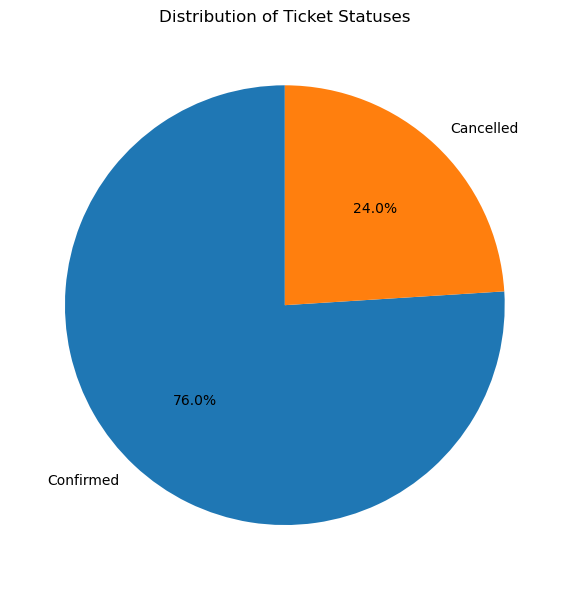

In [187]:
# Query data from the 'Tickets' table and count the number of tickets of each status
cursor.execute('SELECT Status, COUNT(*) AS TicketCount FROM Tickets GROUP BY Status;')

# Fetch the data and store it into a Pandas DataFrame
ticket_count_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Plot a pie chart of the distribution of ticket statuses
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.pie(ticket_count_data['TicketCount'], labels=ticket_count_data['Status'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ticket Statuses')
plt.tight_layout()
plt.show()

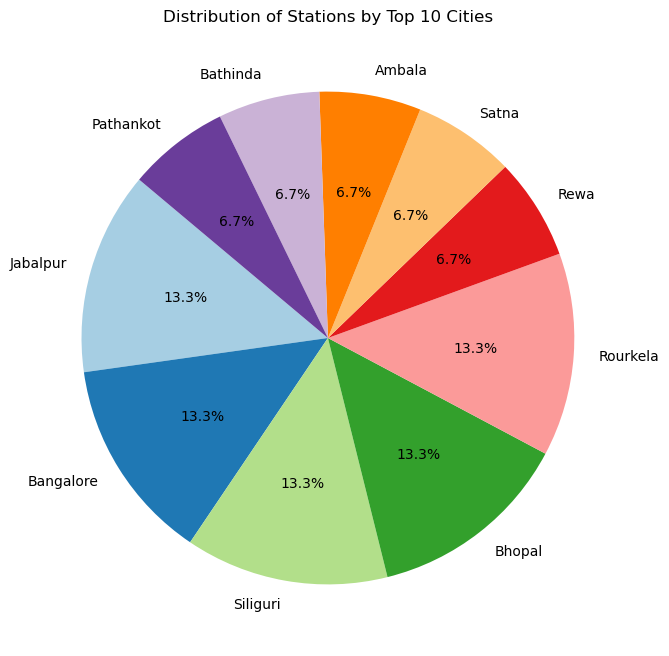

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3  # or any other database connector

# Query data from the 'Stations' table
cursor.execute('SELECT City, COUNT(*) AS StationCount FROM Stations GROUP BY City;')

# Fetch the data and store it into a Pandas DataFrame
stations_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Sort the DataFrame by StationCount in descending order and select the top 10
top_10_stations_data = stations_data.sort_values(by='StationCount', ascending=False).head(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
top_10_stations_data.set_index('City')['StationCount'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(top_10_stations_data))))
plt.title('Distribution of Stations by Top 10 Cities')
plt.ylabel('')  # Hide the y-label
plt.show()

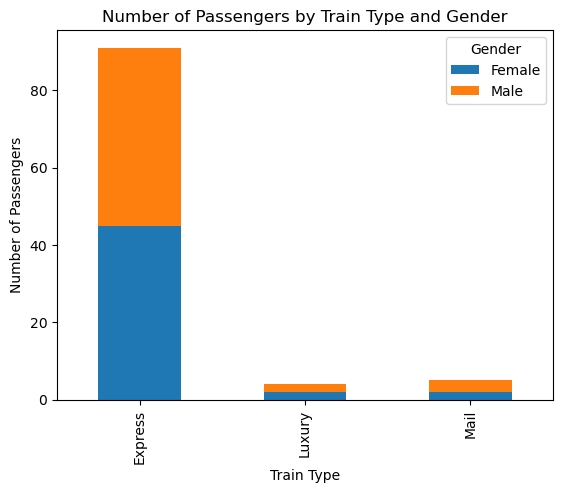

In [186]:
# Query data from the 'Passengers' and 'Trains' tables and join them on the TrainID column
cursor.execute('SELECT Passengers.Gender, Trains.TrainType, COUNT(*) AS PassengerCount FROM Passengers JOIN Bookings ON Passengers.PassengerID = Bookings.PassengerID JOIN Routes ON Bookings.RouteID = Routes.RouteID JOIN Trains ON Routes.TrainID = Trains.TrainID GROUP BY Passengers.Gender, Trains.TrainType;')

# Fetch the data and store it into a Pandas DataFrame
passenger_count_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Pivot the data to create a table of the number of passengers by train type and gender
passenger_count_data = passenger_count_data.pivot(index='TrainType', columns='Gender', values='PassengerCount')

# Plot a stacked bar chart of the number of passengers by train type and gender
passenger_count_data.plot(kind='bar', stacked=True)
plt.title('Number of Passengers by Train Type and Gender')
plt.xlabel('Train Type')
plt.ylabel('Number of Passengers')
plt.show()

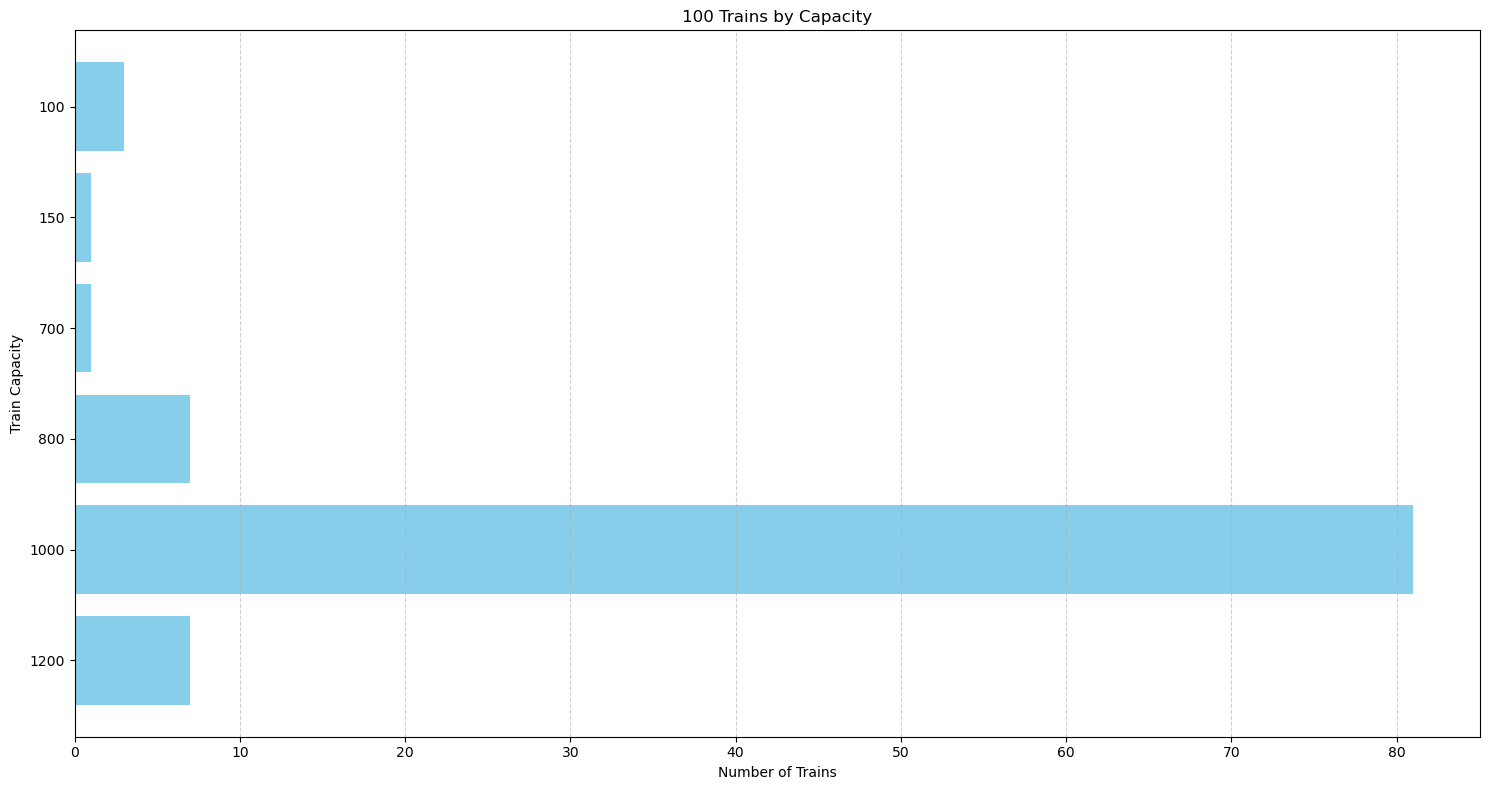

In [190]:
# Randomly 100 trains from the DataFrame
train_capacity_data = train_capacity_data(n=100, random_state=1)

# Aggregate the data by Capacity
aggregated_data = train_capacity_data.groupby('Capacity').size().reset_index(name='Count')

# Plot a horizontal bar chart of Capacity vs. Train Count for the trains
plt.figure(figsize=(15, 8))  # Adjust figure size as needed for readability
plt.barh(aggregated_data['Capacity'].astype(str), aggregated_data['Count'], color='Skyblue')  # Horizontal bar chart
plt.xlabel('Number of Trains')
plt.ylabel('Train Capacity')
plt.title('100 Trains by Capacity')
plt.gca().invert_yaxis()  # Invert y-axis to display capacities in descending order

# Display bar chart
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

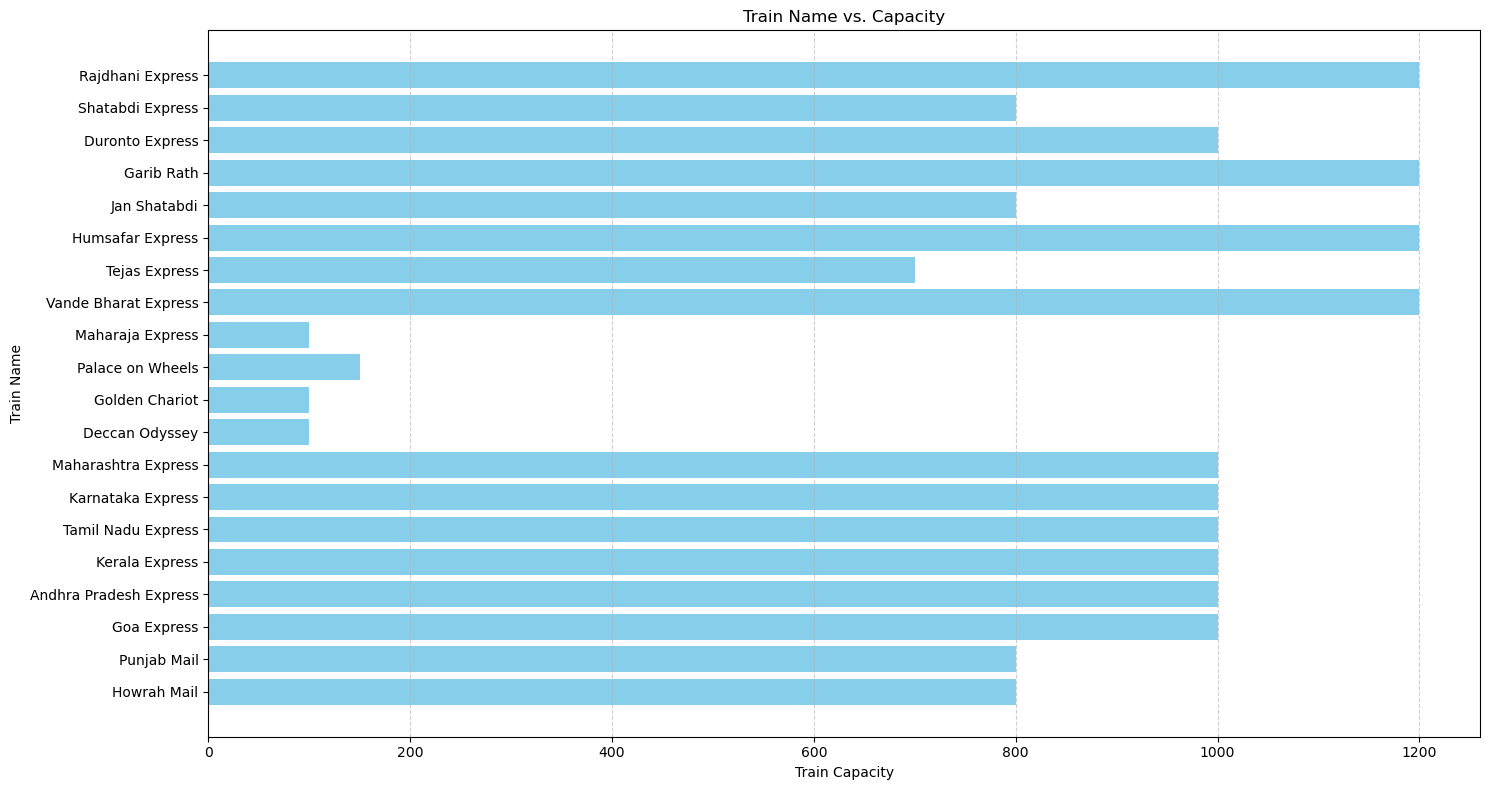

In [182]:
import matplotlib.pyplot as plt
cursor.execute('SELECT TrainName,Capacity(*) FROM Trains GROUP BY Train Name;')
# Horizontal bar chart
plt.figure(figsize=(15, 8))  # Adjust figure size as needed for readability
plt.barh(train_names, capacities, color='Skyblue')  # Horizontal bar chart
plt.xlabel('Train Capacity')
plt.ylabel('Train Name')
plt.title('Train Name vs. Capacity')
plt.gca().invert_yaxis()  # Invert y-axis to display trains with highest capacity at the top

# Display bar chart
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

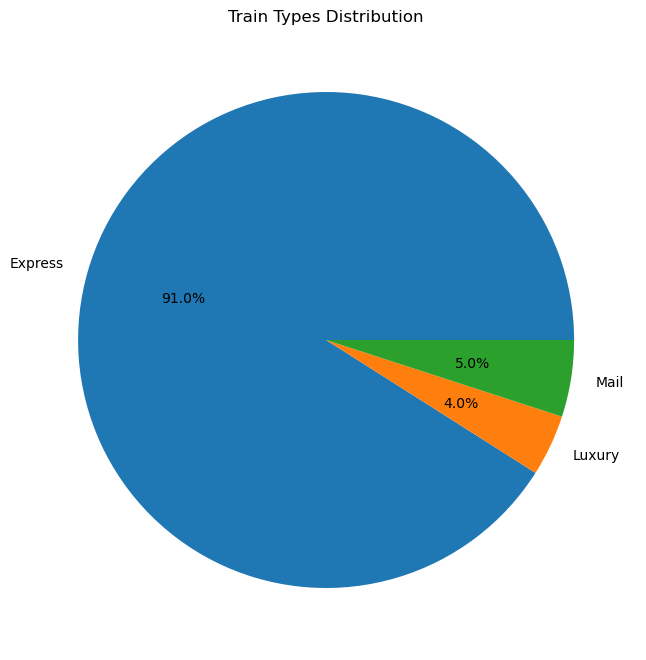

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3  # or any other database connector

# Query data from the 'Trains' table and group by TrainType
cursor.execute('SELECT TrainType, COUNT(*) FROM Trains GROUP BY TrainType;')

# Fetch the data and store it into a Pandas DataFrame
train_type_data = pd.DataFrame(cursor.fetchall(), columns=['TrainType', 'Count'])

# Plot a pie chart of the distribution of train types with specified figure size
plt.figure(figsize=(8, 10))
plt.pie(train_type_data['Count'], labels=train_type_data['TrainType'], autopct='%1.1f%%')
plt.title('Train Types Distribution')
plt.show()

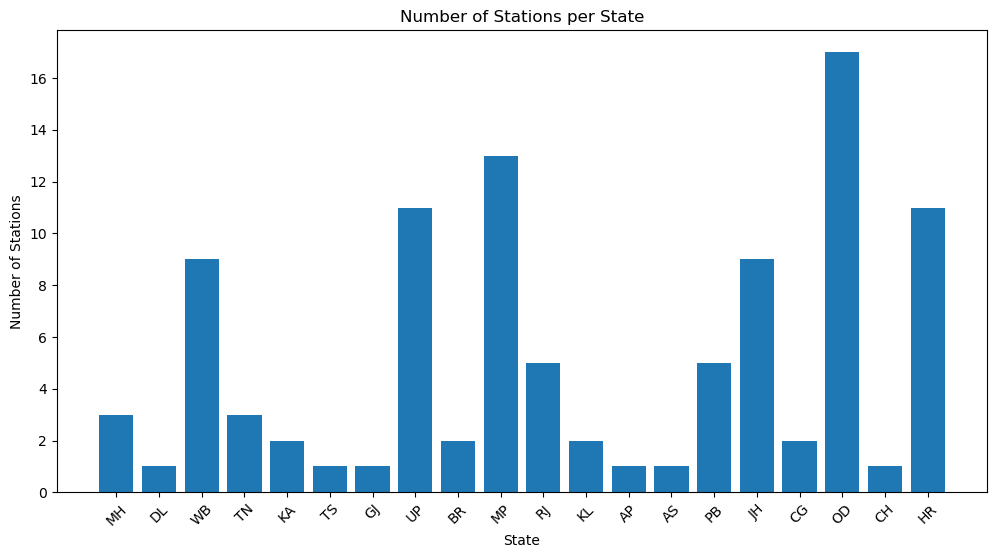

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3  # or any other database connector

# Query data from the 'Stations' table and group by State
cursor.execute('SELECT State, COUNT(*) FROM Stations GROUP BY State;')

# Fetch the data and store it into a Pandas DataFrame
station_state_data = pd.DataFrame(cursor.fetchall(), columns=['State', 'Count'])

# Plot a bar chart of the number of stations by state with specified figure size
plt.figure(figsize=(12, 6))
plt.bar(station_state_data['State'], station_state_data['Count'])
plt.title('Number of Stations per State')
plt.xlabel('State')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

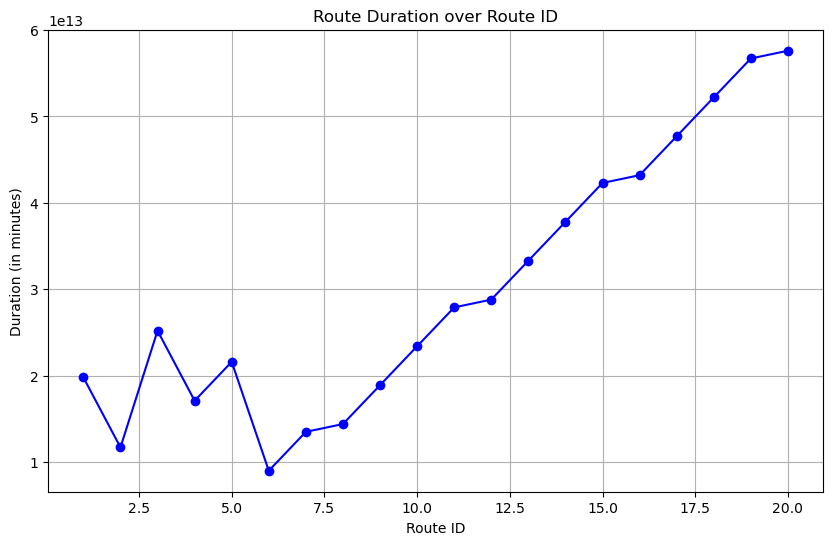

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3  # or any other database connector

# Query data from the 'Routes' table
cursor.execute('SELECT RouteID, Duration FROM Routes;')

# Fetch the data and store it into a Pandas DataFrame
routes_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Limit to the first 20 Route IDs
routes_data = routes_data.head(20)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(routes_data['RouteID'], routes_data['Duration'], marker='o', linestyle='-', color='b')
plt.title('Route Duration over Route ID')
plt.xlabel('Route ID')
plt.ylabel('Duration (in minutes)')  # Adjust the unit as per your data
plt.grid(True)
plt.show()

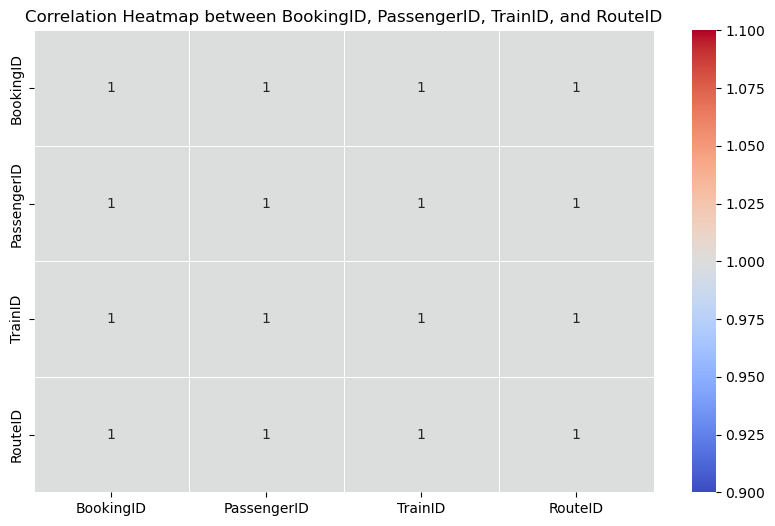

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame
bookings_df = pd.DataFrame(bookings_data)

# Convert BookingDate from string to datetime
bookings_df['BookingDate'] = pd.to_datetime(bookings_df['BookingDate'])
# Calculate the correlation matrix
correlation_matrix = bookings_df[['BookingID', 'PassengerID', 'TrainID', 'RouteID']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between BookingID, PassengerID, TrainID, and RouteID')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_12004\769708666.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


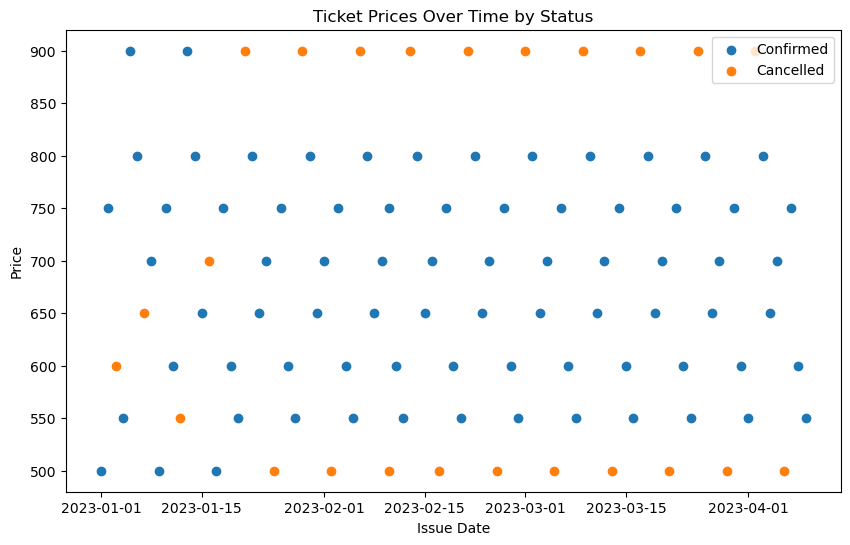

In [31]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the MySQL database
cnx = mysql.connector.connect(user='root', password='root', host='localhost', database='railway_managemnet_system')

# Query data from the 'tickets' table
query = "SELECT IssueDate, Price, Status FROM tickets;"
df = pd.read_sql(query, cnx)

# Convert the 'IssueDate' column to datetime
df['IssueDate'] = pd.to_datetime(df['IssueDate'])

# Plot the scatter plot
plt.figure(figsize=(10, 6))
for status in df['Status'].unique():
    plt.scatter(df[df['Status']==status]['IssueDate'], df[df['Status']==status]['Price'], label=status)
plt.legend()
plt.xlabel('Issue Date')
plt.ylabel('Price')
plt.title('Ticket Prices Over Time by Status')
plt.show()

# Close the database connection
cnx.close()

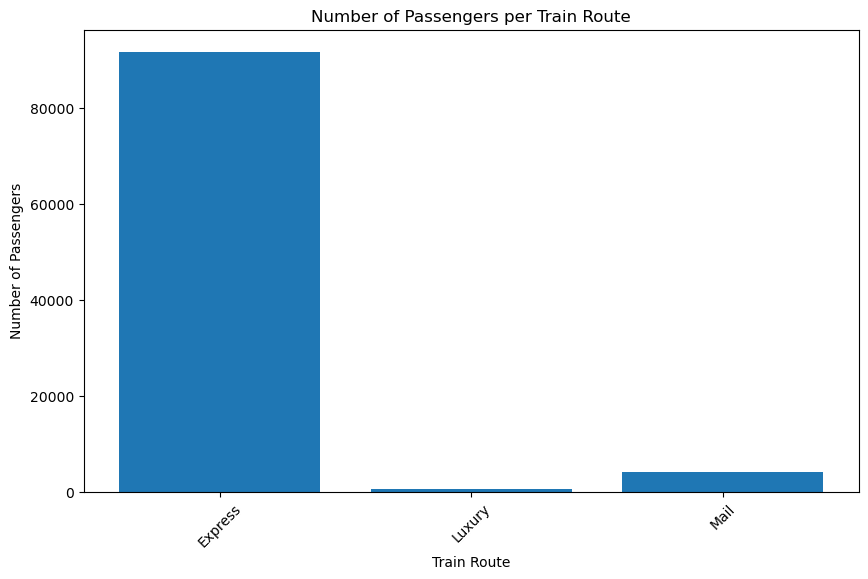

In [141]:
# Query data from the 'passengers' table and select the TrainRoute and NumPassengers columns
cursor.execute('SELECT TrainType, Capacity FROM trains;')

# Fetch the data and store it into a Pandas DataFrame
passengers_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Group the data by train route and calculate the total number of passengers per route
passengers_per_route = passengers_data.groupby('TrainType')['Capacity'].sum()

# Create a bar chart of the number of passengers per train route
plt.figure(figsize=(10, 6))
plt.bar(x=passengers_per_route.index, height=passengers_per_route.values)
plt.title('Number of Passengers per Train Route')
plt.xlabel('Train Route')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.show()

<h2> Step 7: Conclusion</h2>

<p><i>The railway management system is a complex and multifaceted operation that requires careful coordination of various components including scheduling, ticketing, route planning, and customer service.
Effective management of these elements is crucial to ensure operational efficiency, customer satisfaction, and financial sustainability. 
Based on the analysis of data and visualizations, several key conclusions can be drawn.

★ <b>Tickets:</b> The majority of tickets are confirmed, with a smaller percentage being canceled, indicating efficient ticket processing.
    
    
★ <b>Passengers:</b> Most passengers prefer the "Express" trains, which have the highest occupancy compared to other train types.
    
★ <b>Stations:</b> States like Madhya Pradesh and Uttar Pradesh have the highest number of railway stations, showing regional disparities in station distribution.
    
★ <b> Routes:</b> Higher route IDs are associated with longer travel durations, suggesting more extensive routes.
    
★ <b>Trains:</b> "Express" trains dominate the system, making up the vast majority of the train types available.
    
★ <b>Bookings:</b> The system shows a high volume of confirmed bookings, reflecting efficient management and passenger trust. 
        Cancelled bookings are relatively low, indicating a stable booking process.
    </i></p>